In [1]:
import pandas as pd
import numpy as np 


In [2]:
#first entry is with composition, second entry is without composition 
data = [pd.read_pickle('comp_eval_results1.pkl'), pd.read_pickle('wo_comp_eval_results.pkl')]

In [5]:
def extract_data(idata): 
    # Flattening the data
    rows = []
    for run in idata:
        for epoch in run['epochs']:
            row = {
                'run': run['run'],
                **run['parameters'],  # This unpacks the parameters dictionary
                **epoch  # This unpacks the epoch dictionary
            }
            rows.append(row)

    # Creating DataFrame
    df = pd.DataFrame(rows)

    return df


In [6]:
data_dfs = [extract_data(i) for i in data]

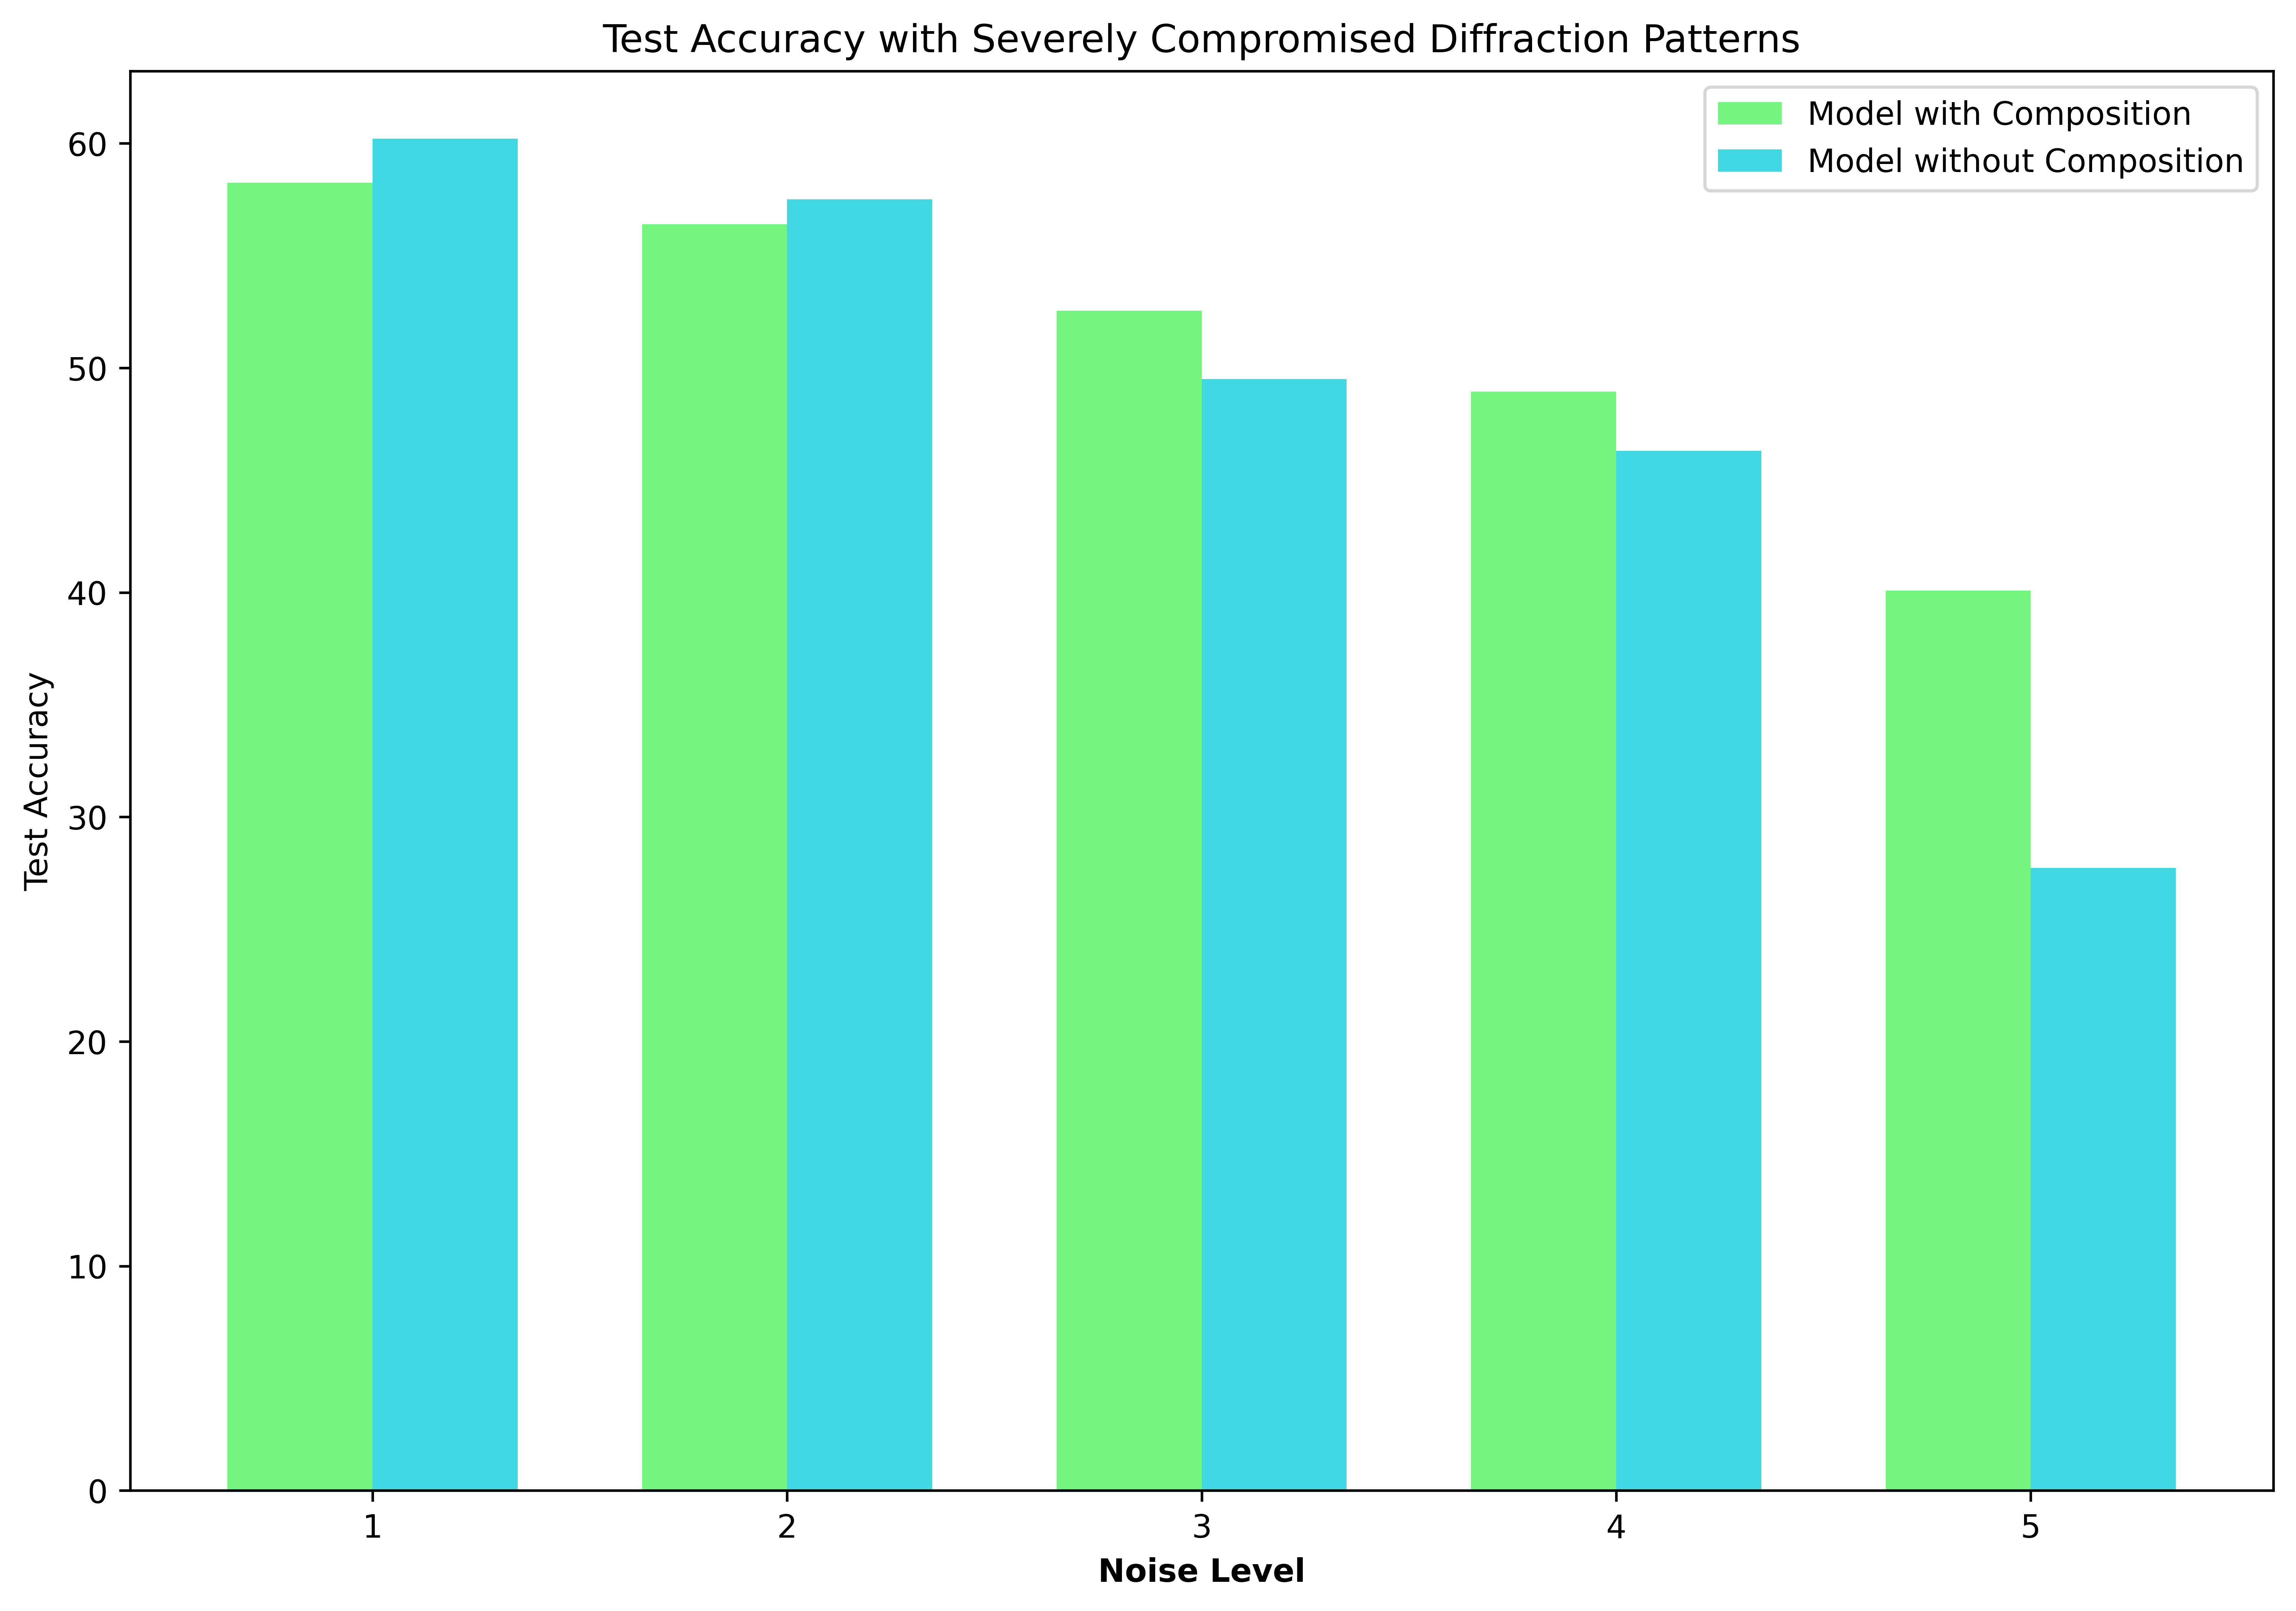

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_dfs' contains your DataFrames
df1 = data_dfs[0][(data_dfs[0]['epoch'] == 99) & (data_dfs[0]['type'] == 'Validation')]
df2 = data_dfs[1][(data_dfs[1]['epoch'] == 99) & (data_dfs[1]['type'] == 'Validation')]

# Selecting 'run' and 'valid_accuracy'
errors_df1 = df1[['run', 'valid_accuracy']]
errors_df2 = df2[['run', 'valid_accuracy']]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8), dpi=600)

# Calculate the bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(errors_df1['run']))
r2 = [x + bar_width for x in r1]

# Make the plot using pastel colors
pastel_blue = '#73f57e'  # A soft green
pastel_red = '#42d8e3'   # A soft blue
ax.bar(r1, errors_df1['valid_accuracy'], color=pastel_blue, width=bar_width, label='Model with Composition')
ax.bar(r2, errors_df2['valid_accuracy'], color=pastel_red, width=bar_width, label='Model without Composition')

# Add xticks on the middle of the group bars
ax.set_xlabel('Noise Level', fontweight='bold')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy with Severely Compromised Diffraction Patterns')
ax.set_xticks([r + bar_width/2 for r in range(len(errors_df1['run']))])
ax.set_xticklabels(errors_df1['run'])

# Create legend & Show graphic
ax.legend()
plt.show()